### Import required Libraries 

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

### Import the dataset 

In [41]:
df = pd.read_csv('Advertising.csv', index_col=0)
print(df.shape)

X=df[['TV', 'radio', 'newspaper']].values
y=df['sales'].values
df.head()

(200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [42]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Check the correlation between advertising channels (features) and sales (target)

In [44]:
# calculate the corelation between "TV" and "sales"
correlation = df['TV'].corr(df['sales'])
print(f"Correlation between TV advertising spend and sales: {correlation:.2f}")

# calculate the corelation between "radio" and "sales"
correlation_radio = df['radio'].corr(df['sales'])
print(f"Correlation between radio advertising spend and sales: {correlation_radio:.2f}")

# calculate the corelation between "newspaper" and "sales"
correlation_newspaper = df['newspaper'].corr(df['sales']) 
print(f"Correlation between newspaper advertising spend and sales: {correlation_newspaper:.2f}")  

Correlation between TV advertising spend and sales: 0.78
Correlation between radio advertising spend and sales: 0.58
Correlation between newspaper advertising spend and sales: 0.23


### Split the dataset into the training and test set 

In [45]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.3, random_state=42)

print(X_train.shape, X_test.shape)

(140, 3) (60, 3)


### Feature scaling 

In [46]:
## feature scaling 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# standardize training data
X_scaled = scale.fit_transform(X_train)

### Train the muitiple linear regression model on the training set 

In [47]:
## linear regression model 
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_scaled, y_train)

# print weights and intercept values
print(lr.coef_, lr.intercept_)

[3.68334078 2.90625242 0.14194772] 14.497142857142856


### Calculate error metrics to evaluate model performance 

In [48]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# standardize testing data
X_test_scaled = scale.transform(X_test)

# make predictions on the test set
ytest_pred = lr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ytest_pred)

# Print evaluation metrics : mae, mse, r2
print('Mean absolute error: ', mae)

mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error: ', mse)

r2 = r2_score(y_test, ytest_pred)
print('R2 score is: ', r2)

Mean absolute error:  1.5116692224549084
Mean squared error:  3.7967972367152214
R2 score is:  0.8609466508230367


In [49]:
# make predictions on the training set
ytrain_pred = lr.predict(X_scaled)

# print evaluation metrics : mae, mse, r2
mae = mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error: ', mae)

mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error: ', mse)

r2 = r2_score(y_train, ytrain_pred)
print('R2 score is: ', r2)

Mean absolute error:  1.1581502948072528
Mean squared error:  2.479355178905787
R2 score is:  0.9055159502227753


### Visualize the actual vs. predicted results

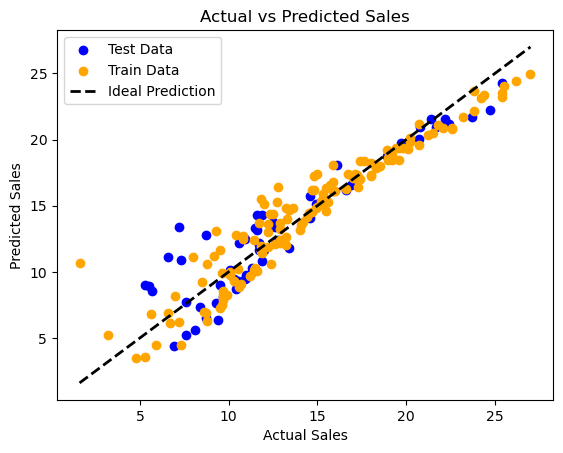

In [ ]:
# visualize the actual vs. predicted results
import matplotlib.pyplot as plt
plt.scatter(y_test, ytest_pred, color='blue', label='Test Data')
plt.scatter(y_train, ytrain_pred, color='orange', label='Train Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()